# Submission 2 Pengembangan Machine Learning

Labib Ammar Fadhali | labibfadhali12@gmail.com

**Konfigurasi Kaggle**

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
upload=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d emmanuelfwerr/london-weather-data

  0% 0.00/226k [00:00<?, ?B/s]
100% 226k/226k [00:00<00:00, 67.2MB/s]


In [5]:
!unzip '/content/london-weather-data.zip' -d '/content'

Archive:  /content/london-weather-data.zip
  inflating: /content/london_weather.csv  


**Membaca Dataset**

In [6]:
import numpy as np
import pandas as pd
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
df=pd.read_csv('/content/london_weather.csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [9]:
df.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

**Membersihkan Data**

In [10]:
df[df.mean_temp.isna()]

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
9751,20050912,7.0,6.4,153.0,22.2,NaN,14.3,0.0,102140.0,0.0
9784,20051015,4.0,6.3,103.0,20.7,NaN,13.2,0.0,102570.0,0.0
9860,20051230,7.0,0.0,12.0,9.6,NaN,-1.4,11.8,99950.0,0.0
9870,20060109,8.0,0.0,14.0,7.1,NaN,4.1,0.0,102540.0,0.0
9895,20060203,8.0,0.0,20.0,3.6,NaN,-2.1,0.0,102480.0,0.0
9937,20060317,8.0,0.3,55.0,6.4,NaN,1.4,0.0,102590.0,0.0
9985,20060504,2.0,10.6,261.0,27.5,NaN,12.5,0.0,101390.0,0.0
10107,20060903,5.0,5.7,157.0,26.6,NaN,16.0,0.0,101070.0,NaN
10173,20061108,7.0,0.0,20.0,15.0,NaN,5.8,0.4,101920.0,0.0
10196,20061201,8.0,0.0,14.0,13.9,NaN,8.8,2.4,101550.0,0.0


In [11]:
df.mean_temp.value_counts()

 10.8    141
 10.2    135
 8.0     134
 15.0    133
 13.8    132
        ... 
-3.4       1
-4.6       1
-5.4       1
 25.1      1
 28.6      1
Name: mean_temp, Length: 321, dtype: int64

In [12]:
df.mean_temp.interpolate(method='linear',limit_direction='forward',inplace=True)
df.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp              0
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [13]:
new_df=df[['date','mean_temp']]
new_df

,date,mean_temp
0,19790101,-4.1
1,19790102,-2.6
2,19790103,-2.8
3,19790104,-2.6
4,19790105,-0.8
...,...,...
15336,20201227,7.5
15337,20201228,1.1
15338,20201229,2.6
15339,20201230,2.7


In [14]:
new_df['date']=pd.to_datetime(new_df['date'], format='%Y%m%d')
new_df

<ipython-input-14-9c4b1fc08c80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date']=pd.to_datetime(new_df['date'], format='%Y%m%d')


,date,mean_temp
0,1979-01-01,-4.1
1,1979-01-02,-2.6
2,1979-01-03,-2.8
3,1979-01-04,-2.6
4,1979-01-05,-0.8
...,...,...
15336,2020-12-27,7.5
15337,2020-12-28,1.1
15338,2020-12-29,2.6
15339,2020-12-30,2.7


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       15341 non-null  datetime64[ns]
 1   mean_temp  15341 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 239.8 KB


**Normalisasi**

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
new_df['mean_temp']=scaler.fit_transform(new_df['mean_temp'].values.reshape(-1, 1))
new_df

<ipython-input-16-4a421c5bf084>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['mean_temp']=scaler.fit_transform(new_df['mean_temp'].values.reshape(-1, 1))


,date,mean_temp
0,1979-01-01,0.095628
1,1979-01-02,0.136612
2,1979-01-03,0.131148
3,1979-01-04,0.136612
4,1979-01-05,0.185792
...,...,...
15336,2020-12-27,0.412568
15337,2020-12-28,0.237705
15338,2020-12-29,0.278689
15339,2020-12-30,0.281421


Text(0.5, 1.0, 'Average Temp')

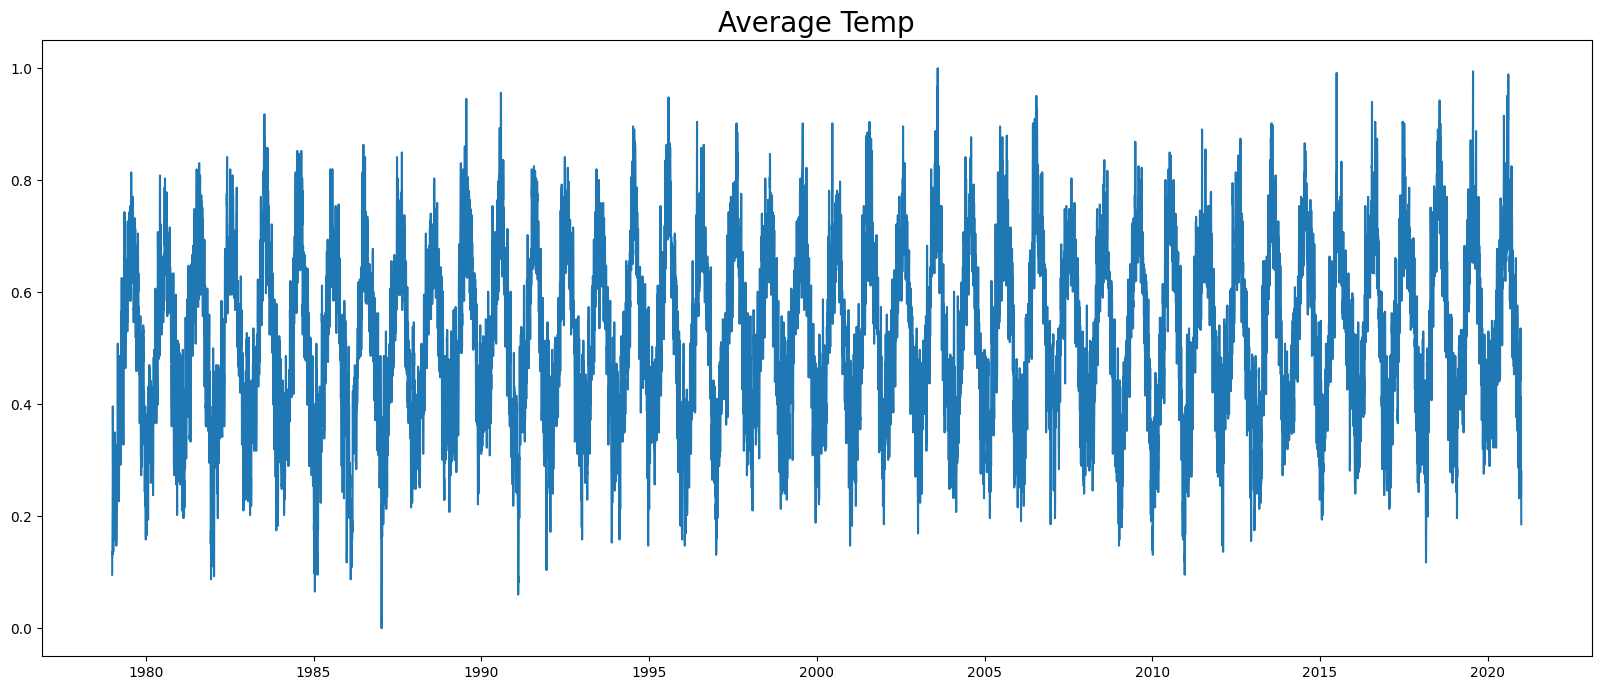

In [17]:
date=new_df['date'].values
temp=new_df['mean_temp'].values

plt.figure(figsize=(20,8))
plt.plot(date,temp)
plt.title('Average Temp', fontsize=20)

Membuat fungsi mengubah data menjadi format yang dapat diterima oleh model

In [18]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

Melakukan split data menjadi 80% data train dan 20% data test

In [19]:
from sklearn.model_selection import train_test_split

temp_train,temp_test,date_train,date_test=train_test_split(temp,date, test_size=0.2, shuffle=False)

print('Train:',len(temp_train)) ##12272
print('Test:',len(temp_test))   ##3069

Train: 12272
Test: 3069


In [20]:
train_set = windowed_dataset(temp_train, window_size=60, batch_size=100, shuffle_buffer=5000)
test_set = windowed_dataset(temp_test, window_size=60, batch_size=100, shuffle_buffer=5000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

In [21]:
max=new_df['mean_temp'].max()
print(max)
min=new_df['mean_temp'].min()
print(min)

1.0
0.0


In [22]:
treshold_mae=(max-min)*10/100
print(treshold_mae)

0.1


In [23]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('mae') < treshold_mae):
      print('\n MAE < ',treshold_mae)
      self.model.stop_training=True
callbacks=myCallback()

Melatih model

In [24]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,
                    epochs=100,
                    validation_data=test_set,
                    verbose=2,
                    callbacks=[callbacks])

Epoch 1/100
123/123 - 44s - loss: 0.1020 - mae: 0.4245 - val_loss: 0.0789 - val_mae: 0.3692 - 44s/epoch - 357ms/step
Epoch 2/100
123/123 - 39s - loss: 0.0545 - mae: 0.2961 - val_loss: 0.0443 - val_mae: 0.2616 - 39s/epoch - 313ms/step
Epoch 3/100
123/123 - 25s - loss: 0.0307 - mae: 0.2098 - val_loss: 0.0262 - val_mae: 0.1894 - 25s/epoch - 200ms/step
Epoch 4/100
123/123 - 27s - loss: 0.0190 - mae: 0.1594 - val_loss: 0.0176 - val_mae: 0.1509 - 27s/epoch - 216ms/step
Epoch 5/100
123/123 - 26s - loss: 0.0137 - mae: 0.1354 - val_loss: 0.0135 - val_mae: 0.1324 - 26s/epoch - 211ms/step
Epoch 6/100
123/123 - 25s - loss: 0.0115 - mae: 0.1247 - val_loss: 0.0117 - val_mae: 0.1239 - 25s/epoch - 203ms/step
Epoch 7/100
123/123 - 25s - loss: 0.0105 - mae: 0.1201 - val_loss: 0.0108 - val_mae: 0.1200 - 25s/epoch - 202ms/step
Epoch 8/100
123/123 - 25s - loss: 0.0101 - mae: 0.1180 - val_loss: 0.0103 - val_mae: 0.1180 - 25s/epoch - 203ms/step
Epoch 9/100
123/123 - 24s - loss: 0.0099 - mae: 0.1170 - val_los

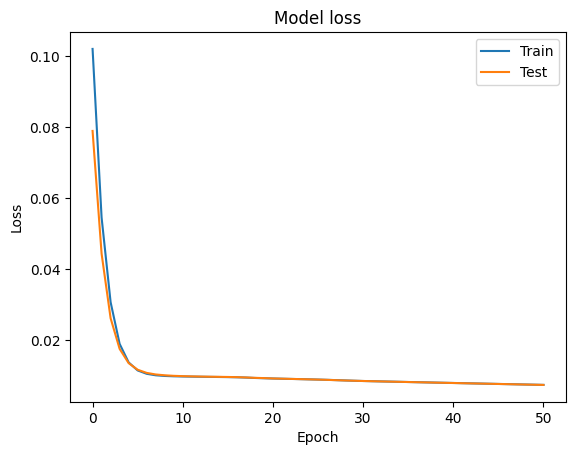

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


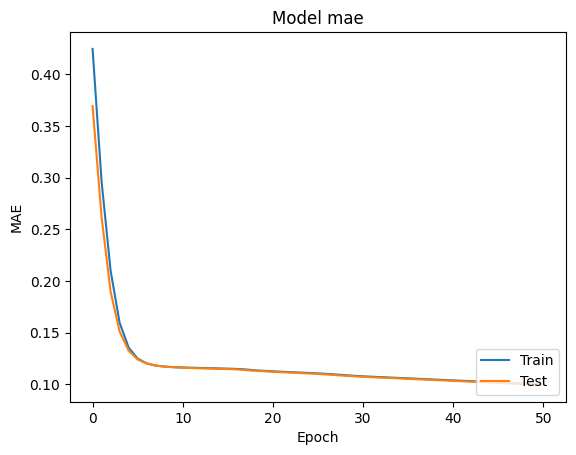

In [26]:

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()